<a href="https://colab.research.google.com/github/Juankisxd/EvaluaciOn/blob/main/Actividad_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo xlsx desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')

In [ ]:
#Verificamos información del DataFrame
Micro_Retailer.info()

In [ ]:
#realizamos diagrama de caja o bigote de cada columna en base a los datos curados
fig= plt.figure(figsize=(15,8))
Micro_Retailer.plot(kind='box', vert=False)
plt.title ("Valores atipicos del Dataframe")
plt.show() #dibujamos el diagrama

LIMPIAMOS DATOS NUMERICOS DE NULOS Y OUTLIERS (COLUMNAS: 21,22, 58, 60, 89,90)



In [ ]:
#Filtro por columnas no consecutivas, ya que no contamos con columnas contiguas de datos
datos=Micro_Retailer.iloc[:,[13, 14, 16, 29]] #Columnas no consecutivas
datos

In [ ]:
#Rellenamos nulos
datos["97_number_of_customers_in_store"]=datos["97_number_of_customers_in_store"].fillna(round(datos["97_number_of_customers_in_store"].mean(),1))
datos["268_number_fridges"] =datos["268_number_fridges"].fillna(round(datos["268_number_fridges"].mean(),1))
datos["104_how_many_shelves_does_the_micro_retailer_have"] =datos["104_how_many_shelves_does_the_micro_retailer_have"].fillna(round(datos["104_how_many_shelves_does_the_micro_retailer_have"].mean(),1))
datos["103_number_own_fridges"] =datos["103_number_own_fridges"].fillna(round(datos["103_number_own_fridges"].mean(),1))

In [ ]:
#corroboramos valores nulos
valores_nulos=datos.isnull().sum()
valores_nulos

ELIMINACION DE OUTLIERS

In [ ]:
#en este punto se define la desviacion estandar en base a los datos restantes
y=datos
limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_superior)

In [ ]:
#encontramos outliers del dataframe curado
data1= datos[(y>limite_superior)|(y<limite_inferior)]
data1

In [ ]:
#convertir outliers en nulos en dataframe
datos2 = datos[(y<=limite_superior)&(y>=limite_inferior)]
datos2

In [ ]:
#corroboramos valores  nulos
valores_nulos=datos.isnull().sum()
valores_nulos

GRAFICAMOS Y REGRESION LINEAL

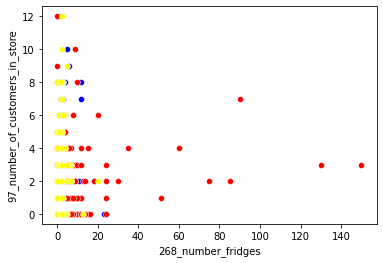

In [13]:
#Se grafican mapas de dispersión de las variables 3 variables:'alcohol', 'speeding' y 'no_previous' al respecto a la variable "total"
from turtle import color

sns.scatterplot(x='268_number_fridges', y='97_number_of_customers_in_store', color="blue", data=datos)
sns.scatterplot(x='104_how_many_shelves_does_the_micro_retailer_have', y='97_number_of_customers_in_store', color="red", data=datos)
sns.scatterplot(x='103_number_own_fridges', y='97_number_of_customers_in_store', color="yellow", data=datos)

In [14]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= datos[['268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have','104_how_many_shelves_does_the_micro_retailer_have']]
Var_Dep= datos['97_number_of_customers_in_store']

In [15]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [16]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [17]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [18]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['268_number_fridges',
        '104_how_many_shelves_does_the_micro_retailer_have',
        '104_how_many_shelves_does_the_micro_retailer_have'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 2.03270073e-01, -7.10126429e+12,  7.10126429e+12]),
 '_residues': 996.5302145811461,
 'rank_': 3,
 'singular_': array([3.68494637e+02, 4.22599282e+01, 1.11216510e-13]),
 'intercept_': 1.012878787878788}

In [19]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 Determinación
model.score(Vars_Indep,Var_Dep)

0.09041819227748749

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred= model.predict(X=datos [['268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have', '104_how_many_shelves_does_the_micro_retailer_have']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
datos.insert(0, 'Predicciones', y_pred)
datos

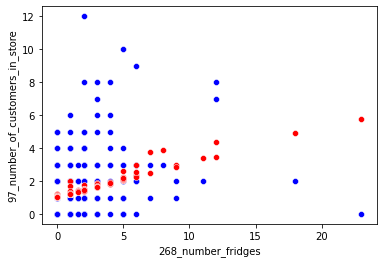

In [22]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='268_number_fridges', y='97_number_of_customers_in_store', color="blue", data=datos)
sns.scatterplot(x='268_number_fridges', y='Predicciones', color="red", data=datos) 
#sns.lineplot(x='alcohol', y='Predicciones', color="red", data=df)

In [23]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.09041819227748749

In [24]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.30069617935299325

ANALISIS REGRESION LOGISTICA 


In [ ]:
#Cargar archivo xlsx desde equipo
from google.colab import files
files.upload()

In [62]:
#Carga desde un archivo .xlsx sin indice
DATOS1= pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')

In [84]:
#Filtro por columnas no consecutivas, ya que no contamos con columnas contiguas de datos
DATOS1=Micro_Retailer.iloc[:,[16, 14, 13]] #Columnas no consecutivas
DATOS1

,104_how_many_shelves_does_the_micro_retailer_have,268_number_fridges,103_number_own_fridges
0,3,3.0,3.0
1,0,0.0,NaN
2,0,0.0,NaN
3,0,0.0,NaN
4,3,2.0,NaN
...,...,...,...
325,7,1.0,NaN
326,5,0.0,NaN
327,1,1.0,NaN
328,1,1.0,NaN


In [ ]:
#Rellenamos nulos
DATOS1["104_how_many_shelves_does_the_micro_retailer_have"]=DATOS1["104_how_many_shelves_does_the_micro_retailer_have"].fillna(round(DATOS1["104_how_many_shelves_does_the_micro_retailer_have"].mean(),1))
DATOS1["268_number_fridges"] =DATOS1["268_number_fridges"].fillna(round(DATOS1["268_number_fridges"].mean(),1))
DATOS1["103_number_own_fridges"] =DATOS1["103_number_own_fridges"].fillna(round(DATOS1["103_number_own_fridges"].mean(),1))

In [86]:
#corroboramos valores nulos
valores_nulos=DATOS1.isnull().sum()
valores_nulos

Predicciones                                         0
97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
103_number_own_fridges                               0
dtype: int64

In [ ]:
#en este punto se define la desviacion estandar en base a los datos restantes
y=DATOS1
limite_superior= y.mean()+3*y.std()
limite_inferior= y.mean()-3*y.std()
print("Limite superior permitido", limite_superior)
print("Limite inferior permitido", limite_superior)

In [ ]:
#encontramos outliers del dataframe curado
DATA1= DATOS1[(y>limite_superior)|(y<limite_inferior)]
DATA1

In [ ]:
#convertir outliers en nulos en dataframe
DATA2 = DATOS1[(y<=limite_superior)&(y>=limite_inferior)]
DATA2

In [ ]:
#corroboramos valores  nulos
valores_nulos=DATOS1.isnull().sum()
valores_nulos

In [74]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= DATOS1[['108_does_the_micro_retailer_has_a_barred_window_', '99_does_the_micro_retailer_exhibits_products_outside_', '102_does_the_micro_retailer_sells_fresh_products_']]
Var_Dep= DATOS1['232_type_of_store']

In [75]:
#Redefinimos las variables 
X= Vars_Indep
y= Var_Dep

In [76]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [77]:
#Se escalan todos los datos
escalar = StandardScaler()

In [79]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [80]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

ValueError: ignored